# Calculadora para Manglares todos los datos

In [2]:
#Operaciones Estadisticas Matematicas y Algebraicas
import numpy.random as rnd
import numpy as np
import math as m
from cmath import sqrt
import pandas as pd
from cmath import sqrt

#Graficar Objetos y Poligonos
from matplotlib.patches import Ellipse
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#Style
plt.style.use(['default'])
#plt.style.use(['science','ieee'])

Datos de Estructura

Definir los labels de Especies y atributos de la tabla

In [10]:
# Datos Vegtacion CGSM 
ds = pd.read_csv("Datasets/Datos-Estrutura-Todos.csv")

In [11]:
#Se pueden apreciar ver los campos de las tabla con el dicionario de especies
print(ds.head(2))

      Fecha   Localidad   Estacion  Transecto Parcela     Especie  \
0  3/9/2022  San Andres  Old Point          1      P1  Rhizophora   
1  3/9/2022  San Andres  Old Point          1      P1  Rhizophora   

   Circunferencia    DAP_cm  Altura_m  Estado  Estado_de_decaimiento  \
0            23.0  7.321110       NaN  Muerto                    3.0   
1            19.0  6.047874       NaN    Vivo                    NaN   

   Biomasa_vivos_kg_Medina_2016  Biomasa_de_arboles_muertos_kg  Fromard_1998  \
0                     33.515163                      23.460614           NaN   
1                     21.534317                            NaN           NaN   

   Yepes_2016_A  Yepes_2016_B  Biomasa_total_kg  
0           NaN           NaN         56.975778  
1           NaN           NaN         21.534317  


In [12]:
#Se analizan cada uno de los campos de la tabla, segun las medidas estadisticas estandar (Conteo, Promedio, Desviacion, Minimo, Maximo)
print(ds.describe())

         Transecto  Circunferencia       DAP_cm    Altura_m  \
count  1098.000000     1098.000000  1098.000000  143.000000   
mean      1.322404       32.385974    10.308599    7.980490   
std       0.655854       25.255072     8.038927    6.375373   
min       1.000000        3.900000     1.241406    1.500000   
25%       1.000000       14.600000     4.647313    3.750000   
50%       1.000000       26.100000     8.319850    5.000000   
75%       1.000000       42.000000    13.368984    8.000000   
max       3.000000      190.000000    60.478737   20.000000   

       Estado_de_decaimiento  Biomasa_vivos_kg_Medina_2016  \
count              70.000000                   1098.000000   
mean                2.757143                    126.715997   
std                 0.600379                    360.197815   
min                 1.000000                      0.550712   
25%                 3.000000                      9.124352   
50%                 3.000000                     34.135090  

Como primer acercamiento a los datos medidos en Campo, se grafican las relaciones entre las medidas hechas para cada especie.
Aqui podemos ver los datos de las especies muestradas para las zonas de Kale y Platero,

En este ejemplo se relacionan:

1. El Diametro a la altura del Pecho (DAP) y la Biomasa 
2. El Diametro a la altura del Pecho (CAP) y la Biomasa 


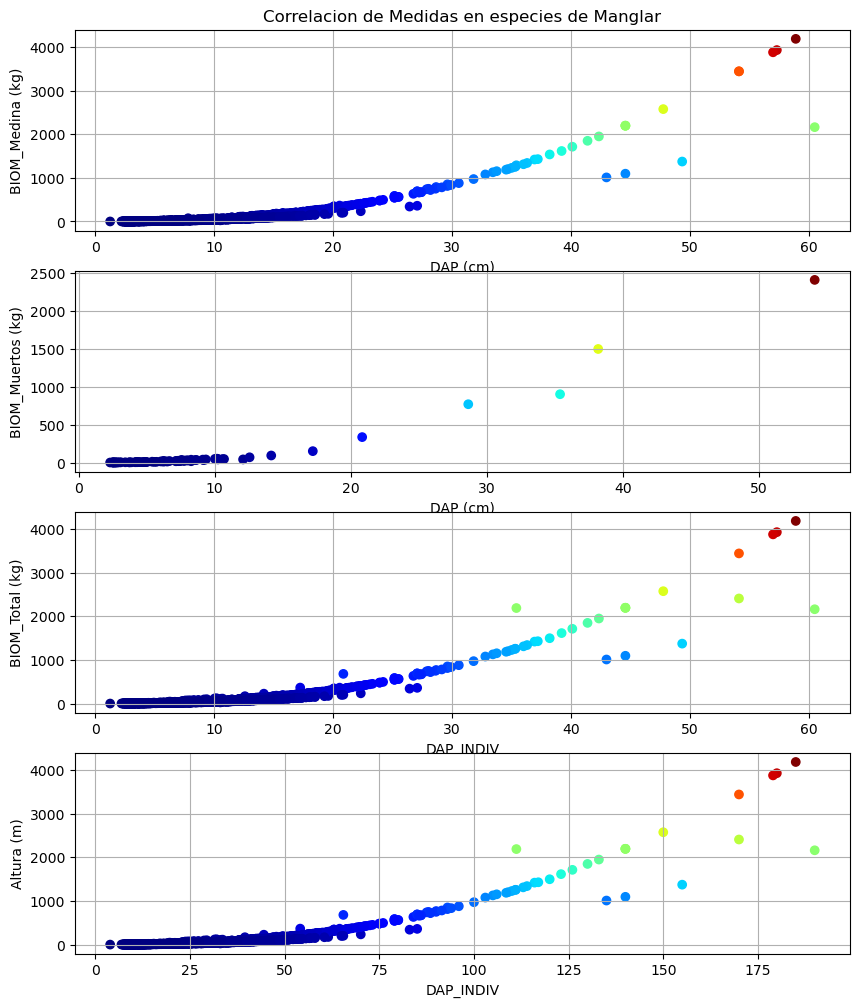

In [16]:
# Figure 1: DAP_INDIV_INDIV_INDIV vs Calculos de Biomasa

fig1,ax = plt.subplots(4,1,figsize=(10,12))
im = ax[0].scatter(ds.DAP_cm,ds.Biomasa_vivos_kg_Medina_2016,c=ds.Biomasa_vivos_kg_Medina_2016,cmap='jet')
ax[0].set_xlabel('DAP (cm)')
ax[0].set_ylabel('BIOM_Medina (kg)')
ax[0].grid(True)
ax[0].set_title('Correlacion de Medidas en especies de Manglar')
#cbar0 = plt.colorbar(im)
#cbar0.set_label('Especie')

im1 = ax[1].scatter(ds.DAP_cm,ds.Biomasa_de_arboles_muertos_kg,c=ds.Biomasa_de_arboles_muertos_kg,cmap='jet')
ax[1].set_xlabel('DAP (cm)')
ax[1].set_ylabel('BIOM_Muertos (kg)')
ax[1].grid(True)

im1 = ax[2].scatter(ds.DAP_cm,ds.Biomasa_total_kg,c=ds.Biomasa_total_kg,cmap='jet')
ax[2].set_xlabel('DAP_INDIV')
ax[2].set_ylabel('BIOM_Total (kg)')
ax[2].grid(True)

im1 = ax[3].scatter(ds.Circunferencia,ds.Biomasa_total_kg,c=ds.Biomasa_total_kg,cmap='jet')
ax[3].set_xlabel('DAP_INDIV')
ax[3].set_ylabel('Altura (m)')
ax[3].grid(True)
#cbar2 = plt.colorbar(im1)
#cbar2.set_label('Especie')

#cbar1 = plt.colorbar(im2)
#cbar1.set_label('Especie')

Tambien se grafican las varibles en en diagramas 3D para comprender la relacion que se ven en las caracteristicas fisicas para cada una de las especies.

In [18]:
# 3D representation

fig = px.scatter_3d(ds,x=ds.DAP_cm,y=ds.Biomasa_total_kg,z=ds.Circunferencia,color=ds.Especie,
                    log_x=False,width=1200, height=800)

fig.show()


In [20]:
# 3D representation

fig = px.scatter_3d(ds,x=ds.DAP_cm,y=ds.Biomasa_total_kg,z=ds.Circunferencia,color=ds.Estacion,
                    log_x=False,width=1200, height=800)

fig.show()

In [21]:
df = ds.copy()

Para comprender si existe mas relaciones entre las variables muestradas para mabos proyectos se elabora una diagrama de correlacion entre las variables.

Aqui podemos ver cual es la correlacion de los valores registrados en catalogo, lo cual indica que las variables que se correlacionan entre si.

<AxesSubplot:>

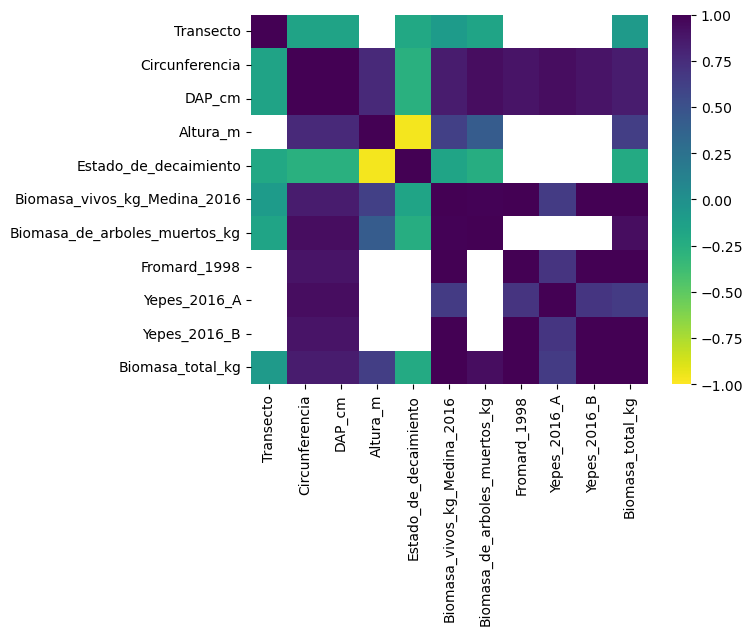

In [22]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='viridis_r', vmin=-1, vmax=1)

Aqui podemos vamos a realiazar un modelo de Machine Learning para evaluar los datos tomados en campo y poder predecir valores de diferentes especies 

Para esto vamos a realizar una regresion lineal
Esta sera calulada con una parte de (Datos de Entrenamiento), y en base a este calculo evaluaremos la parte de los datos restantes (Datos de Prueba).
Una vez creado y testeado el modelo de datos con los datos medidos en campo , se pueden hacer predicciones. 

In [35]:
# para la Regresion Lineal, la segmantacion de los datos y la creacion del Modelo necesitaremos estos paquetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# solution
# Dividir los datos en conjuntos de entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(df['DAP_cm'], axis=1),df['Biomasa_total_kg'], test_size=0.33, random_state=42)
print(df['DAP_cm'].shape, np.expand_dims(df['Biomasa_total_kg'], axis=1).shape)
print(len(X_train), len(y_train), len(X_test), len( y_test))

(1098,) (1098, 1)
735 735 363 363


Coefficients: 
 [38.85611488]
Mean squared error: 33094.27
Coefficient of determination: 0.68


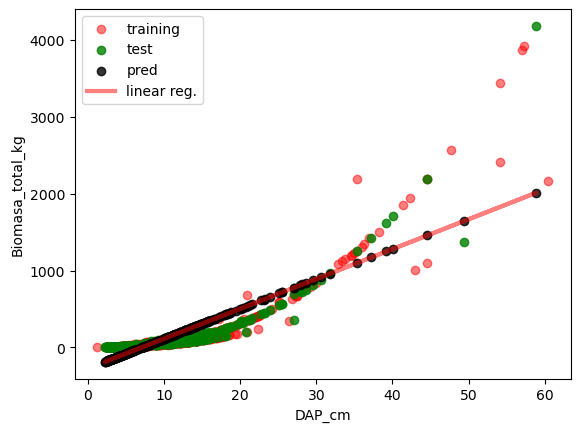

In [32]:
# Crear objeto de regresión lineal
regr = LinearRegression()

# Entrena el modelo usando los conjuntos de entrenamiento.
regr.fit(X_train, y_train)

# Hacer predicciones utilizando el conjunto de prueba
y_pred = regr.predict(X_test)

# para evaluar la calidad de nuesro modelo, usamos diferentes coeficientes
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="red", label='training', alpha=0.5)
plt.scatter(X_test, y_test, color="green", label='test', alpha=0.8)
plt.scatter(X_test, y_pred, color="black", label='pred', alpha=0.8)
plt.plot(X_test, y_pred, color="red", linewidth=3, label='linear reg.', alpha=0.5)
plt.xlabel('DAP_cm')
plt.ylabel('Biomasa_total_kg')
plt.legend()

In [33]:
print(len(X_train), len(y_train), len(X_test), len( y_test))

735 735 363 363


In [38]:
# solution
# Dividir los datos en conjuntos de entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(df['DAP_cm'], axis=1),df['Biomasa_total_kg'], test_size=0.33, random_state=42)
print(df['DAP_cm'].shape, np.expand_dims(df['Biomasa_total_kg'], axis=1).shape)
print(len(X_train), len(y_train), len(X_test), len( y_test))

(1098,) (1098, 1)
735 735 363 363


Coefficients: 
 [38.85611488]
Mean squared error: 33094.27
Coefficient of determination: 0.68


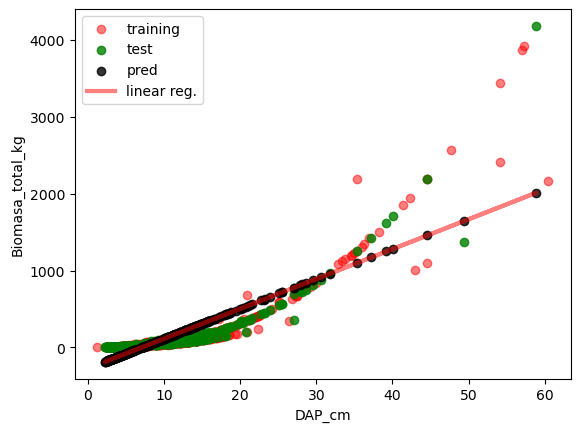

In [39]:
# Crear objeto de regresión lineal
regr = LinearRegression()

# Entrena el modelo usando los conjuntos de entrenamiento.
regr.fit(X_train, y_train)

# Hacer predicciones utilizando el conjunto de prueba
y_pred = regr.predict(X_test)

# para evaluar la calidad de nuesro modelo, usamos diferentes coeficientes
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="red", label='training', alpha=0.5)
plt.scatter(X_test, y_test, color="green", label='test', alpha=0.8)
plt.scatter(X_test, y_pred, color="black", label='pred', alpha=0.8)
plt.plot(X_test, y_pred, color="red", linewidth=3, label='linear reg.', alpha=0.5)
plt.xlabel('DAP_cm')
plt.ylabel('Biomasa_total_kg')
plt.legend()

In [40]:
print(len(X_train), len(y_train), len(X_test), len( y_test))

735 735 363 363


In [41]:
#Selecion de Columnas
df.loc[:, ['Especie','Biomasa_total_kg']]

,Especie,Biomasa_total_kg
0,Rhizophora,56.975778
1,Rhizophora,21.534317
2,Rhizophora,150.493888
3,Rhizophora,107.178048
4,Laguncularia,16.033678
...,...,...
1093,Laguncularia,5.512233
1094,Laguncularia,10.016491
1095,Laguncularia,104.317842
1096,Laguncularia,71.112524


Ahora que tenemos una clara vision de como se relacionan las variables en campo, podemos calcular la cantidad de CO2 capturado por cada planta.

Este calculo de basa en las Funciones alometricas de cada especie y region.

Para esto se generan una serie de fuciones que evaluan la cantidad de CO2 capturado por cada planta.

La funcion evalua la cantidad de CO2 segun el numero de especies en un area determinada.

Para este ejemplo estamos evaluando la funcion para un hectarea con 100 individuos de la misma especia, a lo largo de todo el catalogo del muestreo. 

In [42]:
#Cantidad de Cabono de poligono en el tiempo como Data Frame
#Tiempo en years y numero de individuos
N= 100
t = 1
#Dimensiones del Poligono en metros
X = 10000
Y = 10000
#Cantidad de Individuos
N=1
def CO2_Total_df (S,X ,Y, N, C, t):
    TC = N * C * t
    return pd.DataFrame(index = [S, TC]), 


In [43]:
#Cantidad de Cabono de poligono en el tiempo como Vector
def CO2_Total (S, X ,Y, N, C, t):
    TC = N * C * t
    return TC

In [44]:
# Evaluar las funciones Sobre todos los SAI Old Point
CO2_Total(df.Especie,10000,10000,100,df.Biomasa_total_kg,5)

H=CO2_Total_df(df.Especie,1,1,10,df.Biomasa_total_kg,5)
TC= CO2_Total(df.Especie,1,1,10,df.Biomasa_total_kg,5)

In [45]:
# Se debe verificar el tipo de resultado que esta generando la funcion para saber como operar el resultado 
print(type(H))
print(type(TC))
len(TC)

<class 'tuple'>
<class 'pandas.core.series.Series'>


1098

In [47]:
nc=np.array(TC)
pn=np.append(nc, [0,0])
pn.shape
reshaped1 = pn.reshape(25,44)
#reshaped1

In [48]:
print(np.shape(reshaped1))

(25, 44)


Text(0.5, 1.0, 'Total de CO2 (kg) capturado por hectarea \n de Vegetacion segun Maglares Muestreados ')

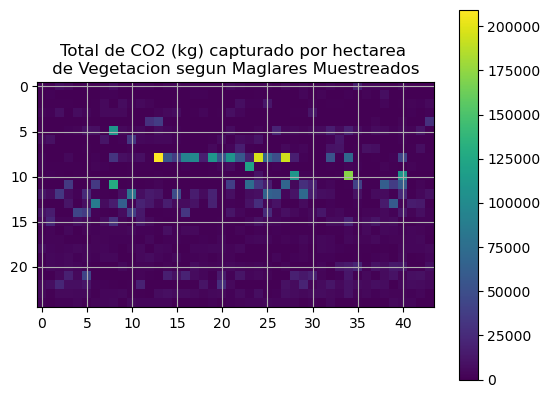

In [49]:
#uso de plt funtions para graficar matricez
plt.figure(1)
plt.grid(True)
plt.imshow(reshaped1)
plt.show
plt.colorbar()
plt.title("Total de CO2 (kg) capturado por hectarea \n de Vegetacion segun Maglares Muestreados ")

#print(x,y)